<a href="https://colab.research.google.com/github/MarinaIMadh/Computer_Vision/blob/main/M2_exercise_solution/ex2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Load an image and apply a thresholding method. Analyze and discuss the segmentation results.

<ipython-input-9-f8775f9c4a88>:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


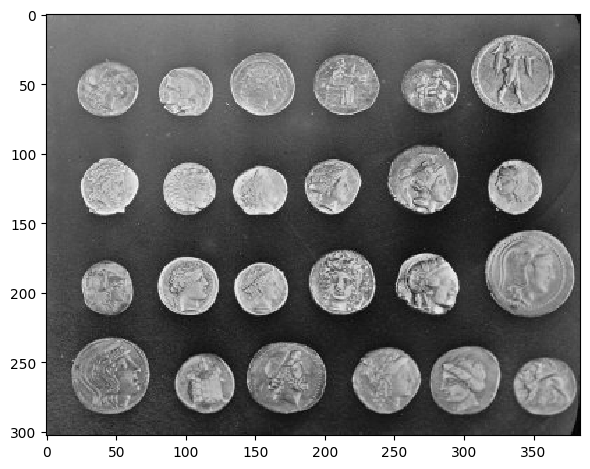

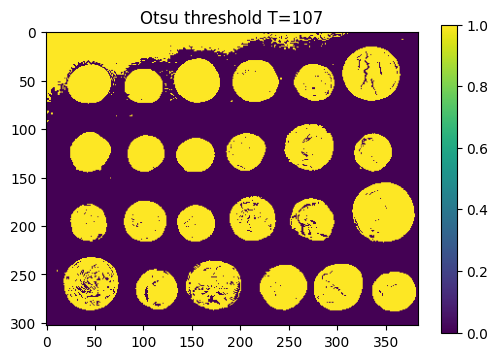

In [9]:
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage import data, io, color

I = data.coins()

io.imshow(I)

thresh = threshold_otsu(I)
binary = I > thresh

fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
imgplot = plt.imshow(binary)
plt.title('Otsu threshold T={}'.format(thresh))
plt.colorbar()
plt.show()

Task 2: Load an image and apply an unsupervised segmentation method (e.g., K-Means). Evaluate and comment on the outcome.

Here N = 850084 and d = 4
The sape of the array should be 850084 x 4


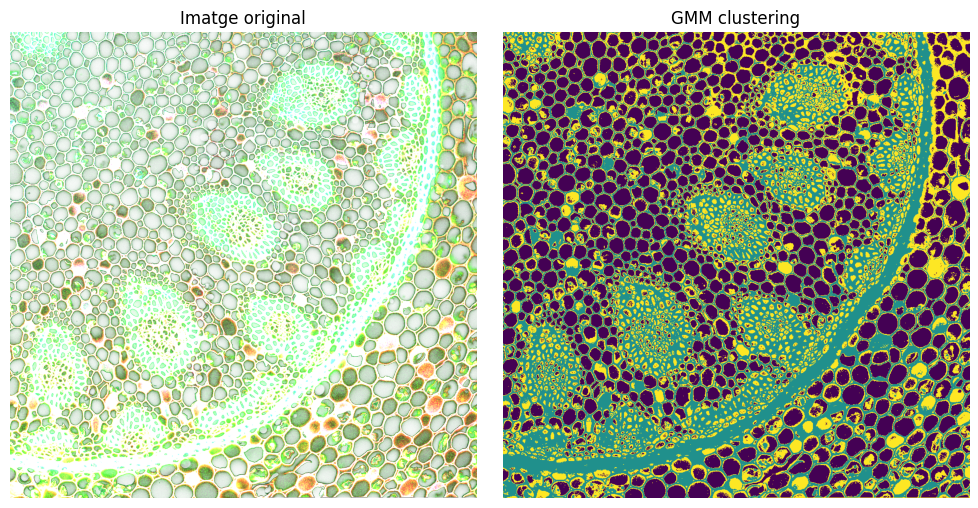

In [11]:
import skimage as sk
import numpy as np


I = sk.data.lily() # load RGM image
v_I = np.reshape(I,(I.shape[0]*I.shape[1],I.shape[2])) # reshape image as NPIX x NCHANNELS array

print('Here N = {} and d = {}'.format(I.shape[0]*I.shape[1],I.shape[2]))
print('The sape of the array should be {} x {}'.format(I.shape[0]*I.shape[1],I.shape[2]))

v_I.shape

# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
# from sklearn.cluster import KMeans
# import numpy as np

# # Fit a Kmeans clustering model with two clusters using training image:
# n_clus = 2
# kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

# v_kmeans = kmeans.predict(v_I)
# #v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
# I_kmeans = np.reshape(v_kmeans,(I.shape[0],I.shape[1])) # reshape back to original image size
#  # Shape back result as image

# fig = plt.figure(figsize=(10, 10))
# gs = gridspec.GridSpec(1, 2)

# ax1 = fig.add_subplot(gs[0,0])
# ax1.imshow(I, cmap=plt.cm.gray)
# ax1.set_title('Original Image')
# ax1.set_axis_off()

# ax2 = fig.add_subplot(gs[0,1])
# ax2.imshow(I_kmeans, cmap=plt.cm.gray)
# ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
# ax2.set_axis_off()

# plt.show()

import skimage as sk # load skimage libraries
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib import gridspec

gmm = mixture.GaussianMixture(n_components=3).fit(v_I) # Fit a GMM model
v_gmm = gmm.fit_predict(v_I) # Predict GMM cluster labels for each pixel
I_gmm = np.reshape(v_gmm,(I.shape[0],I.shape[1])) # reshape back to original image size

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(I)
ax0.set_title('Image original')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_gmm)
ax1.set_title('GMM clustering')
ax1.set_axis_off()

plt.tight_layout()
plt.show()


Task 3: Load an image and apply a supervised segmentation method (e.g., with annotated labels or using a classifier). Discuss the effectiveness and limitations.

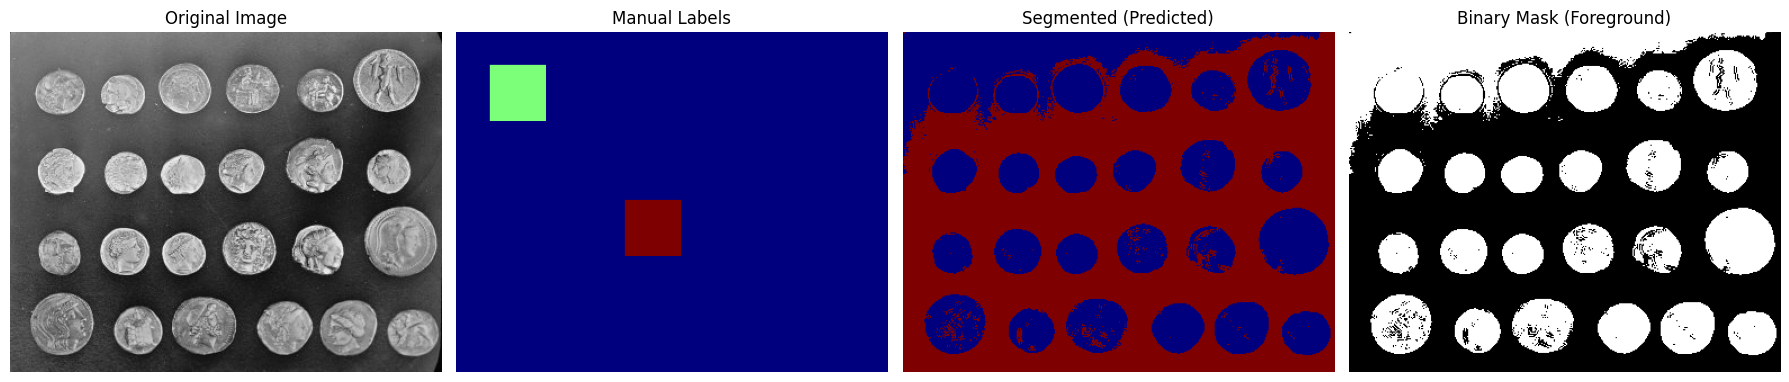

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters, morphology
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Load and convert image to greyscale
image = data.coins()
image_gray = image if image.ndim == 2 else color.rgb2gray(image)

# Manual labels for training (only small regions)
labels = np.zeros(image_gray.shape, dtype=np.uint8)
labels[30:80, 30:80] = 1   # foreground
labels[150:200, 150:200] = 2   # background

# Extract simple features (intensity and edge)
def extract_features(img):
    return np.stack([
        img,
        filters.sobel(img),
        filters.gaussian(img, sigma=1),
    ], axis=-1)

features = extract_features(image_gray)
flat_features = features.reshape(-1, features.shape[-1])
flat_labels = labels.ravel()

# Classifier LDA
classifier = LinearDiscriminantAnalysis()

# Train only on labeled pixels
mask = flat_labels > 0
classifier.fit(flat_features[mask], flat_labels[mask])

# Predict for the entire image
predicted = classifier.predict(flat_features).reshape(image_gray.shape)

# Show the images
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(labels, cmap='jet')
axes[1].set_title("Manual Labels")
axes[1].axis('off')

axes[2].imshow(predicted, cmap='jet')
axes[2].set_title("Segmented (Predicted)")
axes[2].axis('off')

axes[3].imshow(predicted == 1, cmap='gray')
axes[3].set_title("Binary Mask (Foreground)")
axes[3].axis('off')

plt.tight_layout()
plt.show()

Task 4: Explain the main differences between supervised and unsupervised segmentation approaches. Discuss their advantages and disadvantages, and illustrate your explanation with an example.

Here N = 116352 and d = 1
The shape of the array should be 116352 x 1


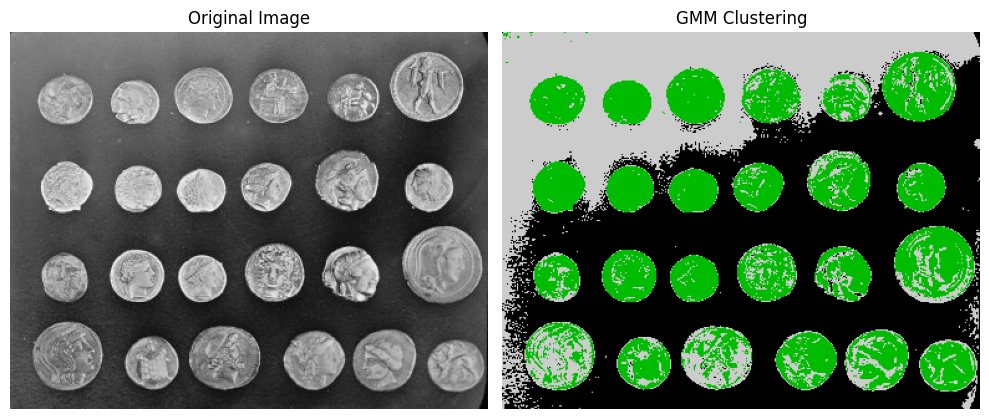

In [21]:
import skimage as sk
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Load grayscale image
I = sk.data.coins()

# Reshape to (n_pixels, 1) for GMM input
v_I = I.reshape(-1, 1)

print('Here N = {} and d = {}'.format(v_I.shape[0], v_I.shape[1]))
print('The shape of the array should be {} x {}'.format(v_I.shape[0], v_I.shape[1]))

# Fit GMM model
gmm = mixture.GaussianMixture(n_components=3, random_state=0).fit(v_I)
v_gmm = gmm.predict(v_I)  # Predict labels
I_gmm = v_gmm.reshape(I.shape)  # Reshape labels to image shape

# Plotting the images
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(I, cmap='gray')
ax0.set_title('Original Image')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0, 1])
ax1.imshow(I_gmm, cmap='nipy_spectral')
ax1.set_title('GMM Clustering')
ax1.set_axis_off()

plt.tight_layout()
plt.show()
